In [1]:
from datetime import date
from datetime import datetime
from dateutil.relativedelta import relativedelta

from matplotlib import pyplot as plt
%matplotlib notebook
import pandas as pd
import seaborn as sns


/Users/amacdon/anaconda/lib/python3.4/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
#from phildb.database import PhilDB
#fitbit_db_name = 'fitbit_db'
#db = PhilDB(fitbit_db_name)

#heart_rate = db.read('AM', '1T', measurand = 'HR').asfreq('1T').ix['2016-08-13']
#heart_rate.to_csv('heart_rate_20160813.csv')

heart_rate = pd.read_csv(
    'heart_rate_20160813.csv',
    header = None,
    skiprows=3,
    parse_dates=True,
    index_col='date',
    squeeze=True,
    names = ('date', None)
)

In [3]:
extract = heart_rate.ix['2016-08-13T13:20':'2016-08-13T14:30'].copy()

<IPython.core.display.Javascript object>


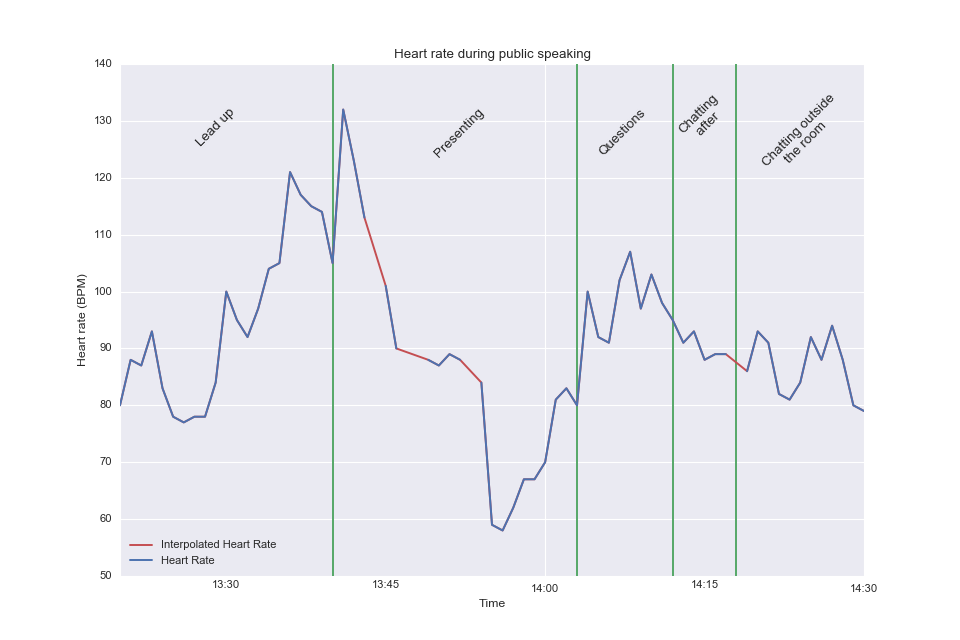

/Users/amacdon/anaconda/lib/python3.4/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [4]:
fig, ax = plt.subplots(figsize=(12, 8))
fig.patch.set_facecolor('white')
fig.patch.set_alpha(1.0)
ax = extract.interpolate().plot(ax = ax, color = sns.color_palette()[2])
ax1 = extract.plot(ax = ax, color = sns.color_palette()[0])


lines, labels = ax1.get_legend_handles_labels()
ax1.legend(lines[:2], ['Interpolated Heart Rate', 'Heart Rate'], loc=3)

key_points = [
    pd.to_datetime('2016-08-13T13:40'),
    pd.to_datetime('2016-08-13T14:03:10'),
    pd.to_datetime('2016-08-13T14:12:40'),
    pd.to_datetime('2016-08-13T14:18')
]

xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()
ax.vlines(x=key_points, ymin=ymin, ymax=ymax, color=sns.color_palette()[1])

ax.text(0.1,0.9,'Lead up',rotation=45, transform = ax.transAxes)
ax.text(0.42,0.9,'Presenting',rotation=45, transform = ax.transAxes)
ax.text(0.64,0.9,'Questions',rotation=45, transform = ax.transAxes)
ax.text(0.748,0.9,'Chatting\n   after',rotation=45, transform = ax.transAxes)
ax.text(0.86,0.9,'Chatting outside\n     the room',rotation=45, transform = ax.transAxes)

ax.set_ylabel('Heart rate (BPM)')
ax.set_xlabel('Time')
ax.set_title('Heart rate during public speaking')
plt.savefig('heart_rate_during_presentation.png', facecolor=fig.get_facecolor())

In [5]:
heart_rate.dropna().describe()

count    1419.000000
mean       77.306554
std        12.971914
min        56.000000
25%        66.000000
50%        78.000000
75%        84.000000
max       132.000000
dtype: float64